# Klasifikasi Weather Australia

##### Import Library

In [29]:
# Library
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Library Preprocessing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Algoritma
from sklearn.tree import DecisionTreeClassifier
# Library Supervised Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Library Evaluation Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
dataset = pd.read_csv("../Dataset/weatherAUS.csv", parse_dates=["Date"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

In [31]:
print(dataset)

             Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow
0      2008-12-01   Albury     13.4     22.9       0.6           W           44.0          W        WNW          20.0          24.0         71.0         22.0       1007.7       1007.1     16.9     21.8        No           No
1      2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0        NNW        WSW           4.0          22.0         44.0         25.0       1010.6       1007.8     17.2     24.3        No           No
2      2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0          W        WSW          19.0          26.0         38.0         30.0       1007.6       1008.7     21.0     23.2        No           No
3      2008-12-04   Albury      9.2     28.0       0.0          NE           24.0         SE        

##### Cek Nilai Null

In [32]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [33]:
dataset = dataset.ffill()
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [34]:
dataset.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [35]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


### Eksplorasi Data Analisis

In [36]:
# fig, ax = plt.subplots(figsize=(10,8))
# sns.barplot(data=df, x="Location", y="Jumlah")

dataset["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df = dataset["RainTomorrow"].value_counts().reset_index(name="Count").sort_values("Count", ascending=False)
df

,RainTomorrow,Count
0,No,112701
1,Yes,32759


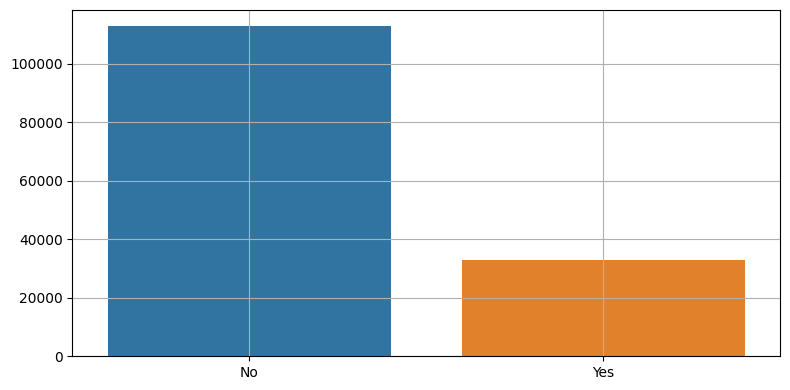

In [38]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df, x="RainTomorrow", y="Count", hue="RainTomorrow")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

In [39]:
df =  dataset["RainToday"].value_counts().reset_index(name="count").sort_values("count", ascending=False)
df

,RainToday,count
0,No,112698
1,Yes,32762


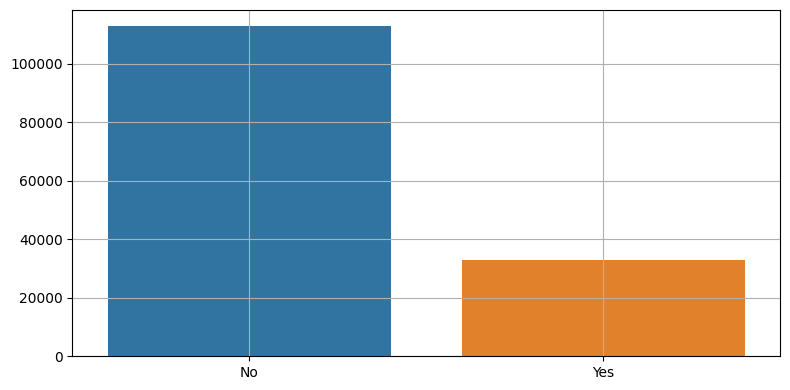

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df, x="RainToday", y="count", hue="RainToday")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

- Cek lokasi hujan

In [41]:
# Pilih fitur RainToday dan Location. Kemudian hitung jumlah nya
df =  dataset[["RainToday", "Location"]].value_counts().reset_index(name="CountRain").sort_values("CountRain", ascending=False)
df.head()

,RainToday,Location,CountRain
0,No,Woomera,2803
1,No,Canberra,2802
2,No,AliceSprings,2792
3,No,Mildura,2681
4,No,Cobar,2619


In [42]:
# Pilih 5 lokasi terbanyak curah hujan
df1 = df[df["Location"] == "Woomera"]
df2 = df[df["Location"] == "Canberra"]
df3 = df[df["Location"] == "AliceSprings"]
df4 = df[df["Location"] == "Mildura"]
df5 = df[df["Location"] == "Cobar"]

# Gabungkan 5 lokasi tersebut
df = pd.concat([df1, df2, df3, df4, df5], axis=0)

# Diurutkan berdasarkan Lokasi dan Hujan
df = df.sort_values(by=["CountRain","RainToday",], ascending=True)
df

,RainToday,Location,CountRain
96,Yes,Woomera,206
94,Yes,AliceSprings,248
92,Yes,Mildura,328
91,Yes,Cobar,390
77,Yes,Canberra,634
4,No,Cobar,2619
3,No,Mildura,2681
2,No,AliceSprings,2792
1,No,Canberra,2802
0,No,Woomera,2803


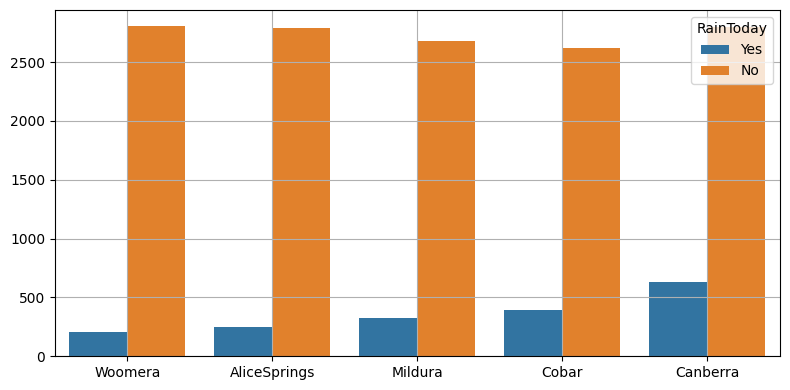

In [43]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=df, x="Location", y="CountRain", hue="RainToday")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

In [44]:
df = dataset.groupby(by=["Location"])[["MaxTemp", "MinTemp"]].aggregate("mean").reset_index().sort_values(by="MaxTemp", ascending=False)
df = np.round(df.head(), 2)
df

,Location,MaxTemp,MinTemp
16,Katherine,34.94,20.59
13,Darwin,32.54,23.21
41,Uluru,30.40,14.43
8,Cairns,29.56,21.22
39,Townsville,29.37,20.42


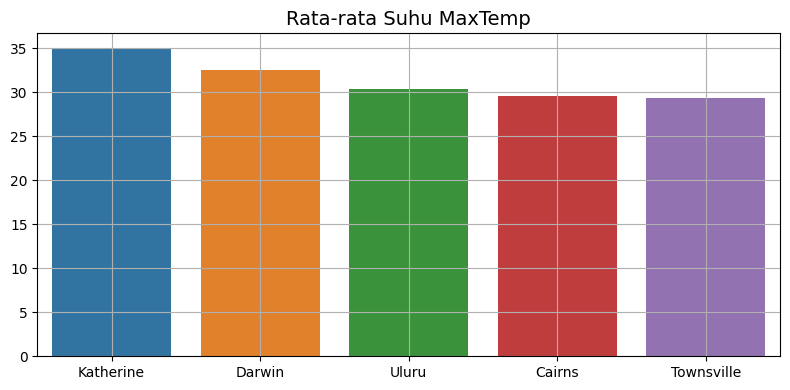

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df, x="Location", y="MaxTemp", hue="Location")
ax.set_title("Rata-rata Suhu MaxTemp", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df = dataset[["Date", "MaxTemp"]]
df

,Date,MaxTemp
0,2008-12-01,22.9
1,2008-12-02,25.1
2,2008-12-03,25.7
3,2008-12-04,28.0
4,2008-12-05,32.3
...,...,...
145455,2017-06-21,23.4
145456,2017-06-22,25.3
145457,2017-06-23,26.9
145458,2017-06-24,27.0


In [47]:
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.lineplot(data=df, x="Date", y="MaxTemp")
# ax.set_title("", fontsize=14)
# ax.set_xlabel("", fontsize=12)
# ax.set_ylabel("", fontsize=12)
# ax.grid(True)
# plt.tight_layout()
# plt.show()

In [48]:
# Pilih fitur RainToday dan Location. Kemudian hitung jumlah nya
df =  dataset[["RainTomorrow", "Location", "Rainfall", "Date"]].value_counts().reset_index(name="CountRain").sort_values("CountRain", ascending=False)
df.head()

,RainTomorrow,Location,Rainfall,Date,CountRain
0,No,Adelaide,0.0,2008-07-03,1
96976,No,Adelaide,0.0,2008-07-25,1
96970,No,Adelaide,0.0,2008-11-29,1
96971,No,Adelaide,0.0,2008-08-18,1
96972,No,Adelaide,0.0,2008-07-05,1


In [49]:
# Pilih 5 lokasi terbanyak curah hujan
df1 = df[df["Location"] == "Woomera"]
df2 = df[df["Location"] == "Canberra"]
df3 = df[df["Location"] == "AliceSprings"]
df4 = df[df["Location"] == "Mildura"]
df5 = df[df["Location"] == "Cobar"]

# Gabungkan 5 lokasi tersebut
df = pd.concat([df1, df2, df3, df4, df5], axis=0)

# Diurutkan berdasarkan Lokasi dan Hujan
df = df.sort_values(by=["CountRain","RainTomorrow",], ascending=True)
df

,RainTomorrow,Location,Rainfall,Date,CountRain
60231,No,Woomera,0.0,2010-02-03,1
60232,No,Woomera,0.0,2010-02-02,1
61082,No,Woomera,0.0,2009-02-21,1
61294,No,Woomera,0.0,2009-01-18,1
61241,No,Woomera,0.0,2009-01-13,1
...,...,...,...,...,...
68360,Yes,Cobar,32.6,2012-01-28,1
68361,Yes,Cobar,34.0,2010-10-15,1
68362,Yes,Cobar,36.0,2010-02-04,1
68750,Yes,Cobar,0.0,2011-01-21,1


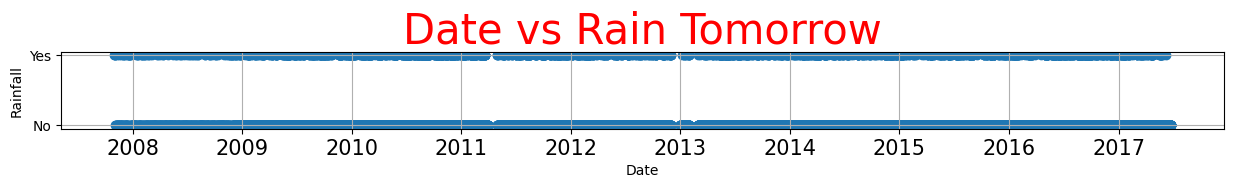

In [50]:
df['Date']=pd.to_datetime(df.Date)
plt.figure(figsize=(15,1))
plt.scatter(df['Date'],df['RainTomorrow'])
plt.title('Date vs Rain Tomorrow',fontsize=30,c='red')
plt.xlabel("Date")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

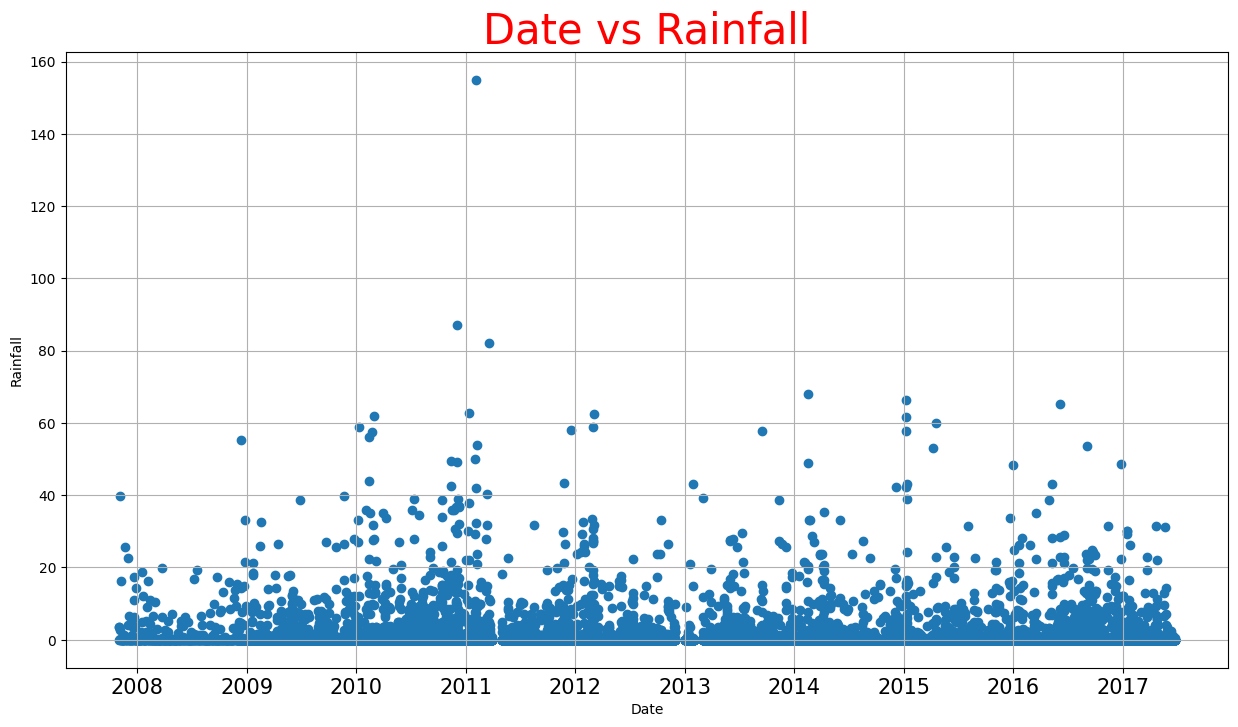

In [51]:
df['Date']=pd.to_datetime(df.Date)
plt.figure(figsize=(15,8))
plt.scatter(df['Date'],df['Rainfall'])
plt.title('Date vs Rainfall',fontsize=30,c='red')
plt.xlabel("Date")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

### Praproses Data Ke-2

In [52]:
print(dataset)

             Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow
0      2008-12-01   Albury     13.4     22.9       0.6           W           44.0          W        WNW          20.0          24.0         71.0         22.0       1007.7       1007.1     16.9     21.8        No           No
1      2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0        NNW        WSW           4.0          22.0         44.0         25.0       1010.6       1007.8     17.2     24.3        No           No
2      2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0          W        WSW          19.0          26.0         38.0         30.0       1007.6       1008.7     21.0     23.2        No           No
3      2008-12-04   Albury      9.2     28.0       0.0          NE           24.0         SE        

In [53]:
x = dataset[["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]].values
y = dataset["RainTomorrow"]

In [54]:
Scaler = MinMaxScaler(feature_range=(0,1))
Scaled = Scaler.fit_transform(x)

In [55]:
TrainX, TestX, TrainY, TestY = train_test_split(Scaled, y, train_size=0.9, test_size=0.1, random_state=7, shuffle=True)

In [56]:
print(TrainX.shape, TrainY.shape)
print(TestX.shape, TestY.shape)

# (130914, 12) (130914, 1)
# (14546, 12) (14546, 1)

(130914, 12) (130914,)
(14546, 12) (14546,)


In [57]:
print(TrainX.shape, TrainY.shape)
print(TestX.shape, TestY.shape)

(130914, 12) (130914,)
(14546, 12) (14546,)


### Model Klasifikasi

- C45

In [58]:
Result_C45 = DecisionTreeClassifier(criterion="gini", random_state=None).fit(TrainX, TrainY).predict(TestX)
Result_C45

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [59]:
Conf_C45 = confusion_matrix(TestY, Result_C45)
Conf_C45

array([[9646, 1699],
       [1577, 1624]], dtype=int64)

In [60]:
print(confusion_matrix(TestY, Result_C45))

[[9646 1699]
 [1577 1624]]


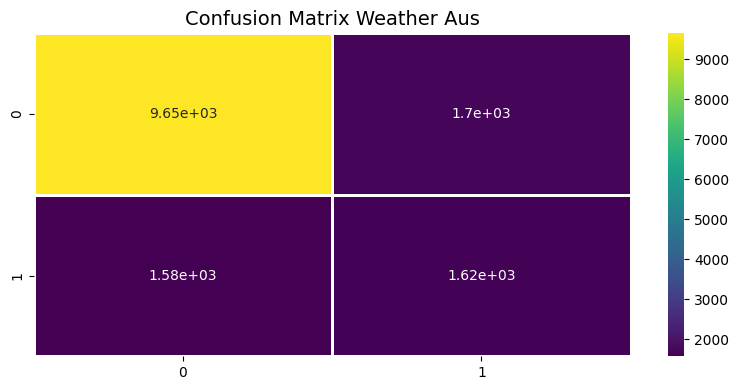

In [61]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(data=confusion_matrix(TestY, Result_C45), annot=True, fmt=".3g", linewidths=1, cmap="viridis")

ax.set_title("Confusion Matrix Weather Aus", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(False)

plt.tight_layout()
plt.show()

In [62]:
print(classification_report(y_true=TestY, y_pred=Result_C45))

              precision    recall  f1-score   support

          No       0.86      0.85      0.85     11345
         Yes       0.49      0.51      0.50      3201

    accuracy                           0.77     14546
   macro avg       0.67      0.68      0.68     14546
weighted avg       0.78      0.77      0.78     14546



In [63]:
Result_C45.shape

(14546,)

- KNN

In [64]:
Process_KNN = KNeighborsClassifier(n_neighbors=2).fit(TrainX, TrainY).predict(TestX)
Process_KNN

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [65]:
Conf_KNN = confusion_matrix(TestY, Process_KNN)
Conf_KNN

array([[10903,   442],
       [ 2099,  1102]], dtype=int64)

In [66]:
print(classification_report(y_true=TestY, y_pred=Process_KNN))

              precision    recall  f1-score   support

          No       0.84      0.96      0.90     11345
         Yes       0.71      0.34      0.46      3201

    accuracy                           0.83     14546
   macro avg       0.78      0.65      0.68     14546
weighted avg       0.81      0.83      0.80     14546



- NB

In [67]:
Result_NB = GaussianNB().fit(TrainX, TrainY).predict(TestX)
Result_NB

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype='<U3')

In [68]:
Conf_NB = confusion_matrix(TestY, Result_NB)
Conf_NB

array([[10478,   867],
       [ 1721,  1480]], dtype=int64)

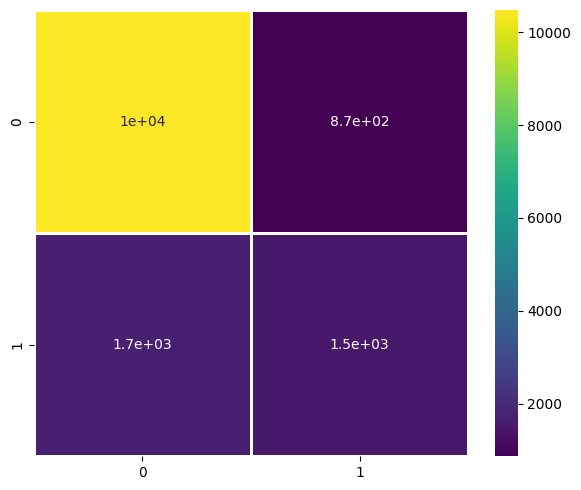

In [69]:

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(Conf_NB, cmap="viridis", annot=True, linewidths=1)
plt.tight_layout()
plt.show()

In [70]:
print(classification_report(y_true=TestY, y_pred=Result_NB))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89     11345
         Yes       0.63      0.46      0.53      3201

    accuracy                           0.82     14546
   macro avg       0.74      0.69      0.71     14546
weighted avg       0.81      0.82      0.81     14546



- SVC

In [71]:
Result_SVC = SVC(kernel='rbf').fit(TrainX, TrainY).predict(TestX)
Result_SVC

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [72]:
print(confusion_matrix(TestY, Result_SVC))

[[11001   344]
 [ 1905  1296]]


In [73]:
print(classification_report(TestY, Result_SVC))

              precision    recall  f1-score   support

          No       0.85      0.97      0.91     11345
         Yes       0.79      0.40      0.54      3201

    accuracy                           0.85     14546
   macro avg       0.82      0.69      0.72     14546
weighted avg       0.84      0.85      0.83     14546



- LR

In [74]:
Result_LR = LogisticRegression(max_iter=1000).fit(TrainX, TrainY).predict(TestX)
Result_LR

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [75]:
print(confusion_matrix(TestY, Result_LR))

[[10797   548]
 [ 1791  1410]]


In [76]:
print(classification_report(TestY, Result_LR))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     11345
         Yes       0.72      0.44      0.55      3201

    accuracy                           0.84     14546
   macro avg       0.79      0.70      0.72     14546
weighted avg       0.83      0.84      0.82     14546

